# Manhwa Analysis

This is a mini Python project I created to sharpen my data analysis skills.  
The dataset is manually compiled based on action, murim, and hunter-themed manhwa I have personally read. Each entry was documented and structured into a dataset format suitable for analysis.

The goal of this project is to explore the dataset through statistics and visualizations, uncover interesting insights about high-performing titles, platform preferences, and more.

# 1. Import Libraries

In [52]:
# Basic data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot styling
sns.set_theme(style='whitegrid', palette='pastel')
%matplotlib inline

# 2. Load Dataset

In [68]:
# Load dataset
data_path = "Manhwa Cleaned.csv"
data = pd.read_csv(data_path, encoding='utf-8-sig')

# Check the number of rows and columns
data.shape  # Output format: (rows, columns)

(45, 8)

# 3. Data Cleaning

In [69]:
# Normalize column names: lowercase, no spaces
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert 'readers' to numeric (remove commas if necessary)
data['readers'] = data['readers'].astype(str).str.replace(',', '').astype(float)

# Optional: convert chapters to numeric if needed
data['chapters'] = pd.to_numeric(data['chapters'], errors='coerce')

# Check for duplicates
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Number of duplicate rows: 0
Missing values per column:
title           0
author          0
rating          0
readers         0
release_year    0
status          0
platform        0
chapters        0
dtype: int64


# 4. Data Preview

In [70]:
print(data.columns.tolist())

['title', 'author', 'rating', 'readers', 'release_year', 'status', 'platform', 'chapters']


In [71]:
# Display the first 5 rows of the dataset
data.head()

,title,author,rating,readers,release_year,status,platform,chapters
0,I'm going to destroy this country,SAN.G,10,"3,852,000",2025,Ongoing,KakaoPage,33
1,"Myst, might, mayhem",Kim Tae-Hyung,10,"2,000,000",2024,Ongoing,Webtoon,71
2,Best teacher baek,Ganjjajang,10,"27,600,000",2021,Ongoing,Webtoon,117
3,Solo leveling,Chugong,10,"5,500,000,000",2018,Complete,KakaoPage,200
4,The demonic cult leader is too reluctant,Kim Hyun-Young,9,"585,846",2024,Ongoing,Webtoon,21


# 5. Data Description

Below is a brief explanation of each column in the dataset:

1. **tittle** – The title of the manhwa (comic series).
2. **author** – The creator or writer of the manhwa.
3. **rating** – The average reader rating on the original platform.
4. **readers** – The total number of readers recorded on the original publishing platform.
5. **release_year** – The year the manhwa was first published or serialized.
6. **status** – Indicates whether the manhwa is ongoing or completed.
7. **platform** – The digital platform or publisher where the manhwa was originally released (e.g., Webtoon, KakaoPage).
8. **chapters** – Total number of chapters published.

# 6. Data Info & Descriptive Statistics

In [59]:
# Display dataset structure and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         45 non-null     object 
 1   author        45 non-null     object 
 2   rating        45 non-null     float64
 3   readers       45 non-null     float64
 4   release_year  45 non-null     int64  
 5   status        45 non-null     object 
 6   platform      45 non-null     object 
 7   chapters      45 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 2.9+ KB


# 7. Explatory Data Analysis (EDA)

In [60]:
# Display summary statistics for numerical features
pd.options.display.float_format = '{:,.0f}'.format
data[['rating', 'readers', 'chapters']].describe()

,rating,readers,chapters
count,45,45,45
mean,10,"209,668,421",139
std,0,"823,016,761",83
min,9,"585,846",21
25%,10,"4,000,000",80
50%,10,"27,600,000",124
75%,10,"88,478,000",200
max,10,"5,500,000,000",411


In [61]:
# Top 10 Manhwa by Rating
top_rating = data.sort_values(by='rating', ascending=False).head(10)
top_rating[['title', 'rating']].style.format({'rating': '{:.1f}'})

,title,rating
3,Solo leveling,10.0
26,Eleceed,9.9
27,Omniscient Reader's Viewpoint,9.9
29,The greatest estate developer,9.9
0,I'm going to destroy this country,9.9
32,Infinite mage,9.9
19,Ranker who lives twice,9.9
18,Moon-shadow sword emeperor,9.9
15,Bizzarre restaurant,9.9
30,Leveling with the gods,9.9


In [62]:
# Top 10 Manhwa by Readers
pd.options.display.float_format = '{:,.0f}'.format
top_readers = data.sort_values(by='readers', ascending=False).head(10)
top_readers[['title', 'readers']]

,title,readers
3,Solo leveling,"5,500,000,000"
39,Solo max-level newbie,"901,333,000"
27,Omniscient Reader's Viewpoint,"464,700,000"
26,Eleceed,"396,000,000"
19,Ranker who lives twice,"330,000,000"
22,Poison-eating healer,"271,900,000"
37,Mercenary Enrollment,"235,000,000"
29,The greatest estate developer,"166,900,000"
40,SSS-Class Suicide Hunter,"120,000,000"
44,Regressor instruction manual,"100,000,000"


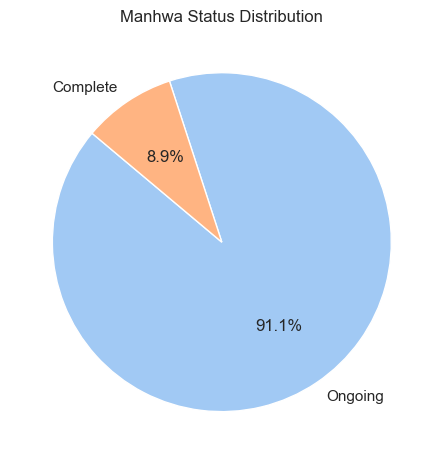

In [63]:
# Status Distribution (Pie Chart)
data['status'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)

plt.title("Manhwa Status Distribution")
plt.ylabel('')
plt.tight_layout()
plt.show()

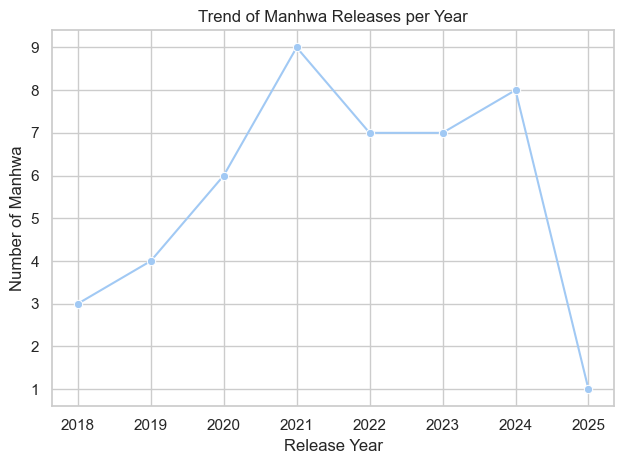

In [64]:
# Release Trend by Year
release_trend = data['release_year'].value_counts().sort_index()
sns.lineplot(x=release_trend.index, y=release_trend.values, marker='o')

plt.title("Trend of Manhwa Releases per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Manhwa")
plt.tight_layout()
plt.show()

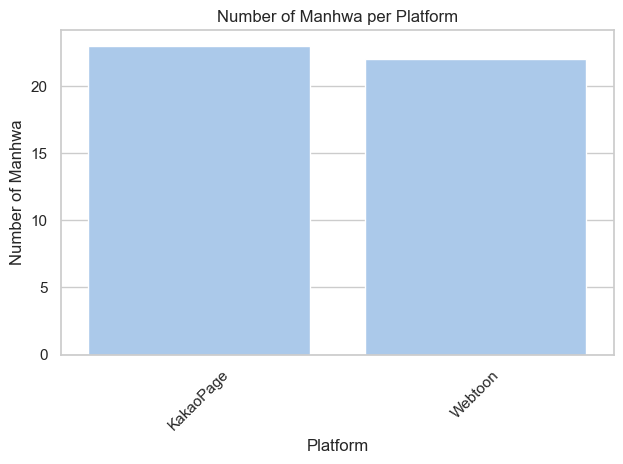

In [65]:
# Platform Popularity
platform_counts = data['platform'].value_counts()
sns.barplot(x=platform_counts.index, y=platform_counts.values)

plt.title("Number of Manhwa per Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Manhwa")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

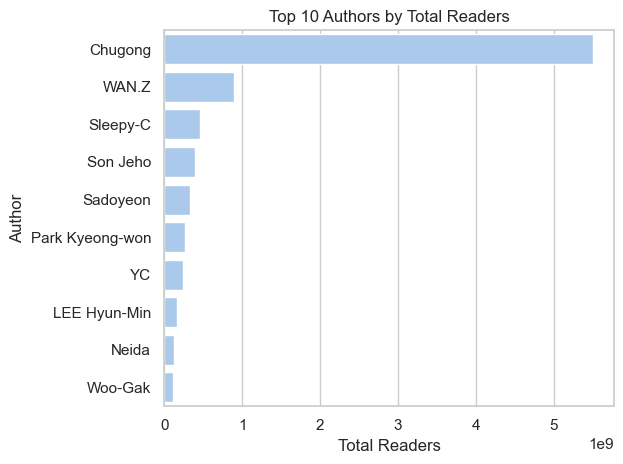

In [66]:
# Top Authors by Total Readers
top_authors_readers = data.groupby('author')['readers'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_authors_readers.values, y=top_authors_readers.index)

plt.title("Top 10 Authors by Total Readers")
plt.xlabel("Total Readers")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

# 8. Key Insights

- Most manhwas in this dataset have excellent ratings, with an average close to 9.7 out of 10.
- Titles like *Solo Leveling* and *Omniscient Reader’s Viewpoint* are not only top-rated but also among the most read.
- The majority of manhwas are published on Webtoon and KakaoPage, indicating dominance of these platforms.
- The trend shows a rise in action/murim-themed manhwa after 2020, reflecting growing global popularity.
- Authors such as Chugong and San.G are repeatedly present in top-performing titles.


# 7. Personal Reflection

This mini project was my personal initiative to practice data analysis using a dataset I created based on manhwas I enjoy. Although the data is limited and manually compiled, the process helped me reinforce my skills in Python, data visualization, and storytelling.

Through this exploration, I learned not only about my data preferences but also how to structure a full EDA workflow—from loading, cleaning, exploring, to deriving insights.

I look forward to refining this project further, maybe with a larger dataset and more advanced analytics. For now, I’m proud that this small step reflects my commitment to continuous learning.